<a href="https://colab.research.google.com/github/SAMashiyane/organophosphate_pro/blob/main/pycaret_organph_atropin_days_v2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
    <h1 align="center">*Pycartet* for days_of_atropin_adminstration</h1>
    <h3 align="center">Investigating the relationship between patient variables and the number of days of atropine administration </h3>
</div>

Test for runtime system(GPU OR CPU)

In [1]:
!nvidia-smi

Sat Jan 14 06:40:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Importing the libraries

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 22.9 MB/s eta 0:00:00
   

### **CLASSIFICATION FOR THIS DATA!!**

In [4]:
from pycaret.classification import *


**mount in google drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load 

In [7]:
#Let's Read csv file
data_Total = pd.read_csv("/content/drive/MyDrive/organ_final - corect.csv")
#Show some records of dataframe
data_Total.sample(5)

,File.Number,Hour.Of.Add,Time.Of.Ingestion,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,Amount.Of.Used.Toxin,Kind.Of.Used.Toxin,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Bradycardia,Rhales,Bronchospasm,Incontinence,Fasciculation,Muscular.Weakness,Parlaysis,Tachycardia,Confusion,Lethargia,Coma,Agitation,Seijure,GCS,Systol,Diastole,T,PR,RR,Modified.SAPS2,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...ABG,PCO2...ABG,PO2...ABG,HCO3...ABG,BE...ABG,PH...VBG,PCO2...VBG,PO2...VBG,HCO3...VBG,BE...VBG,NA,K,BS,Cr,BUN,WBC,Hb,Hct,PLT,AST,ALT,ALP,LDH,CPK,CPK.mb,PT,PTT,INR,Lactic.acid,Albumin,Bullos.Of.Atropin,Total.Atropin,Bullos.Pralidoxime,Total.Pralidoxime,Total.Days.Of.Atropin,Total.Days.Of.Pralidoxime,Pneumonia.Aspiration,Intubation,Days.Of.Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Of.ICU.Add,EMG.NCV,Outcome
104,526870,12,22,14,1,40,2,100,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,130,80,37.0,80,15,0,7850,7485,0,0,0,0,0,7.40,40.1,35.0,25.0,0.0,140,3.9,84,1.3,36.0,7.7,15.1,44.8,157.0,20.0,12,135,0.0,0,0,14.2,25.0,1.27,0,0.0,1.0,25.0,0.0,500.0,3,0,0,0,0,1,6,5,0,0
79,420825,19,0,19,1,27,0,100,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,120,80,0.0,87,15,0,1229,500,0,0,0,0,0,7.23,58.9,50.0,21.3,0.0,141,4.3,143,1.1,17.5,12.5,14.2,0.0,220.0,15.0,11,288,0.0,0,0,12.4,30.0,0.90,0,0.0,0.5,67.0,0.0,12.0,3,0,0,0,0,0,7,0,0,0
59,475216,24,18,6,0,16,2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,120,75,37.0,94,17,0,400,420,0,0,0,0,0,7.40,30.8,36.0,19.1,0.0,138,3.8,89,1.0,29.0,14.3,12.8,39.3,317.0,14.0,17,203,419.0,142,0,12.4,29.3,1.06,0,0.0,0.5,0.5,0.0,12.0,1,0,0,0,0,0,1,0,0,0
18,484061,1,0,1,0,40,2,30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,15,110,70,36.0,83,14,0,230,490,0,0,0,0,0,0.00,0.0,45.0,15.0,0.0,143,3.6,123,0.8,21.0,8.6,11.9,38.9,190.0,24.0,15,130,0.0,0,0,0.0,0.0,0.00,0,0.0,1.0,3.0,0.0,480.0,3,3,0,0,0,0,5,0,2,0
57,458354,16,14,2,0,24,2,90,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,13,120,80,0.0,0,0,0,394,196,0,0,0,0,0,7.36,31.1,60.0,17.5,0.0,141,4.3,123,1.0,29.0,14.1,14.8,0.0,195.0,23.0,11,186,402.0,118,0,0.0,0.0,0.00,0,0.0,0.5,35.2,0.0,12.0,2,0,0,0,0,0,2,0,2,0


In [9]:
data_sel = data_Total.drop(["File.Number", "Hour.Of.Add", "Time.Of.Ingestion","Total.Atropin","Bullos.Pralidoxime","Total.Days.Of.Pralidoxime","Leng.Of.Hospital.Add","Leng.Of.ICU.Add","Outcome"], axis = 1)
data_sel.head()

,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,Amount.Of.Used.Toxin,Kind.Of.Used.Toxin,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Bradycardia,Rhales,Bronchospasm,Incontinence,Fasciculation,Muscular.Weakness,Parlaysis,Tachycardia,Confusion,Lethargia,Coma,Agitation,Seijure,GCS,Systol,Diastole,T,PR,RR,Modified.SAPS2,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...ABG,PCO2...ABG,PO2...ABG,HCO3...ABG,BE...ABG,PH...VBG,PCO2...VBG,PO2...VBG,HCO3...VBG,BE...VBG,NA,K,BS,Cr,BUN,WBC,Hb,Hct,PLT,AST,ALT,ALP,LDH,CPK,CPK.mb,PT,PTT,INR,Lactic.acid,Albumin,Bullos.Of.Atropin,Total.Pralidoxime,Total.Days.Of.Atropin,Pneumonia.Aspiration,Intubation,Days.Of.Intubation,ICU.Add,EMG.NCV
0,6,0,19,1,30,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,110,70,0.0,86,20,0,103,1156,0,0,0,0,0,7.36,35.7,50.0,20.0,0.0,142,3.7,157,0.6,32.0,12.2,7.8,0.0,245.0,22.0,15,117,586.0,181,0,0.0,0.0,0.00,0,0.0,2.00,39.7,2,0,0,0,1,0
1,8,0,30,1,200,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,14,110,70,36.8,135,45,0,135,340,0,0,0,0,0,0.00,0.0,50.0,15.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,14,100,0.0,0,0,0.0,0.0,0.00,0,0.0,0.25,500.0,4,0,0,0,0,0
2,1,0,18,2,60,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,135,75,0.0,130,16,0,166,374,0,0,0,0,0,7.31,45.1,49.0,22.9,0.0,142,4.1,109,0.7,0.0,14.4,12.1,0.0,277.0,17.0,15,174,841.0,52,0,12.4,31.7,1.06,0,0.0,0.50,27.0,1,0,0,0,0,0
3,3,1,54,1,200,2,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,15,180,120,37.0,71,16,0,176,618,0,0,0,0,0,7.25,61.0,32.4,22.9,0.0,141,3.6,150,1.1,43.0,9.9,15.0,44.7,199.0,24.0,15,130,0.0,0,0,10.8,33.3,0.88,0,0.0,0.50,16.5,1,0,0,0,0,0
4,2,1,54,2,30,2,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,15,140,90,0.0,54,14,0,177,456,0,0,0,0,0,7.32,49.9,45.0,25.3,0.0,144,3.9,394,1.0,99.0,10.6,14.4,0.0,345.0,16.0,21,129,516.0,109,0,12.3,30.6,0.90,0,0.0,8.40,12.0,2,0,0,0,0,0


In [10]:
s=setup(data = data_sel, target = 'Total.Days.Of.Atropin', session_id=123,train_size = 0.8,use_gpu=True)

,Description,Value
0,session_id,123
1,Target,Total.Days.Of.Atropin
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(117, 76)"
5,Missing Values,False
6,Numeric Features,31
7,Categorical Features,44
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Total.Days.Of.Atropin',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('c

### **Compare Model()**

In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.4300,0.0,0.2713,0.3237,0.3369,0.2478,0.3018,0.107
rf,Random Forest Classifier,0.4111,0.0,0.2213,0.2123,0.2758,0.0943,0.1235,0.463
dummy,Dummy Classifier,0.3878,0.0,0.1711,0.1533,0.2190,0.0000,0.0000,0.006
et,Extra Trees Classifier,0.3556,0.0,0.1765,0.2104,0.2612,0.0752,0.0850,0.433
knn,K Neighbors Classifier,0.3233,0.0,0.1495,0.2190,0.2419,0.0218,0.0360,0.160
gbc,Gradient Boosting Classifier,0.3044,0.0,0.1427,0.2884,0.2860,0.1201,0.1268,1.639
lightgbm,Light Gradient Boosting Machine,0.2911,0.0,0.1309,0.2318,0.2476,0.0552,0.0629,0.160
dt,Decision Tree Classifier,0.2789,0.0,0.1423,0.2728,0.2571,0.0810,0.0886,0.014
ridge,Ridge Classifier,0.2489,0.0,0.1381,0.1860,0.2040,0.0026,0.0013,0.017
svm,SVM - Linear Kernel,0.2267,0.0,0.0920,0.1667,0.1676,0.0285,0.0315,0.023


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:compare_models() succesfully completed......................................


In [12]:
top3= compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.4300,0.0,0.2713,0.3237,0.3369,0.2478,0.3018,0.105
rf,Random Forest Classifier,0.4111,0.0,0.2213,0.2123,0.2758,0.0943,0.1235,0.457
dummy,Dummy Classifier,0.3878,0.0,0.1711,0.1533,0.2190,0.0000,0.0000,0.006
et,Extra Trees Classifier,0.3556,0.0,0.1765,0.2104,0.2612,0.0752,0.0850,0.443
knn,K Neighbors Classifier,0.3233,0.0,0.1495,0.2190,0.2419,0.0218,0.0360,0.022
gbc,Gradient Boosting Classifier,0.3044,0.0,0.1427,0.2884,0.2860,0.1201,0.1268,1.640
lightgbm,Light Gradient Boosting Machine,0.2911,0.0,0.1309,0.2318,0.2476,0.0552,0.0629,0.160
dt,Decision Tree Classifier,0.2789,0.0,0.1423,0.2728,0.2571,0.0810,0.0886,0.014
ridge,Ridge Classifier,0.2489,0.0,0.1381,0.1860,0.2040,0.0026,0.0013,0.017
svm,SVM - Linear Kernel,0.2267,0.0,0.0920,0.1667,0.1676,0.0285,0.0315,0.023


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 3
INFO:logs:[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), DummyClassifier(constant=None, random_state=123, strategy='prior')]
INFO:logs:compare_models() succesfully completed......................................


In [13]:
top3

[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=123),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 DummyClassifier(constant=None, random_state=123, strategy='prior')]

## Create a Model

In [15]:
# check available models
models()

INFO:logs:gpu_param set to True


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [14]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4000,0.0,0.2500,0.1750,0.2400,0.2308,0.2835
1,0.5000,0.0,0.2857,0.2917,0.3600,0.3056,0.3595
2,0.4000,0.0,0.2500,0.4143,0.3679,0.2593,0.3669
3,0.2222,0.0,0.2500,0.4583,0.2025,0.0870,0.1970
4,0.4444,0.0,0.2917,0.3611,0.3778,0.2623,0.3032
5,0.5556,0.0,0.4000,0.3333,0.4111,0.3333,0.3939
6,0.5556,0.0,0.3333,0.3926,0.4506,0.3793,0.4259
7,0.4444,0.0,0.2500,0.2556,0.3241,0.2241,0.2569
8,0.3333,0.0,0.1944,0.2222,0.2646,0.1000,0.1083


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 4
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:create_model() succesfully completed......................................


## Plot_model

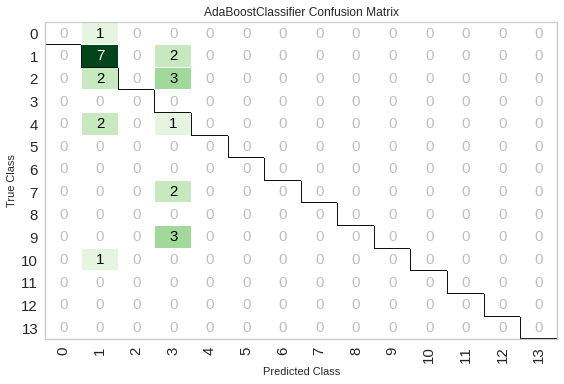

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
# plot_model(estimator=rf,plot = 'auc')
plot_model(ada, plot = 'confusion_matrix')

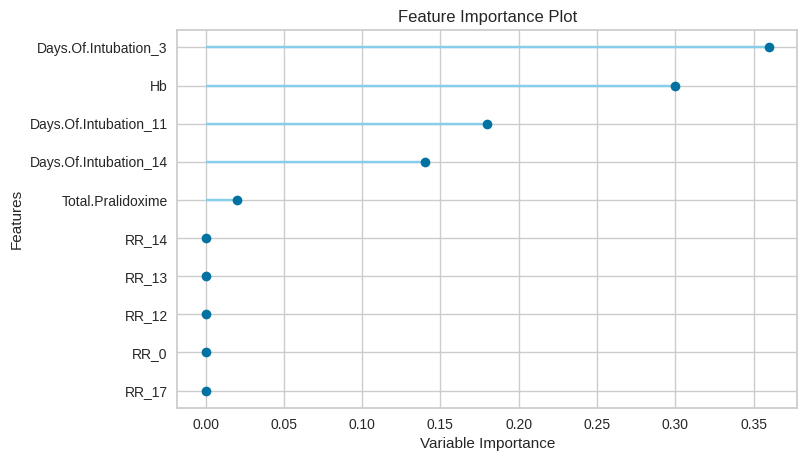

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(ada, plot = 'feature')

## **Ensembling**

In [ ]:
knn = create_model('knn')
rf = create_model('rf')
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0,1.0000,0.8750,0.9333,0.0,0.0
1,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
2,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
3,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
4,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
5,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
6,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
7,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
8,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 9
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
blend = blend_models([knn,rf,et])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0,1.0000,0.8750,0.9333,0.0,0.0
1,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
2,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
3,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
4,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
5,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
6,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
7,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
8,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 10
INFO:logs:VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                

## **evaluate models**

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

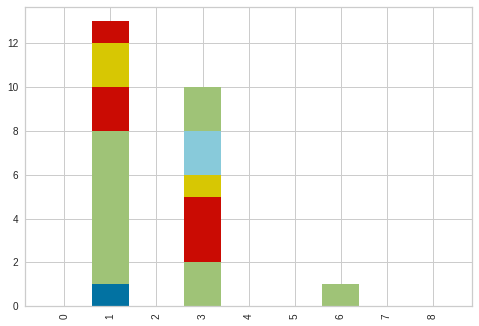

<Figure size 576x396 with 0 Axes>

In [ ]:
evaluate_model(ada)

#** Regression in this data**

In [18]:
# !pip install pycaret

In [19]:
from pycaret.regression import *

In [20]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_Total = pd.read_csv("/content/drive/MyDrive/organ_final - corect.csv")

In [ ]:
data_sel = data_Total.drop(["File.Number", "Hour.Of.Add", "Time.Of.Ingestion"], axis = 1)
data_sel.head()

,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,Kind.Of.Used.Toxin,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Rhales,Bronchospasm,Incontinence,Fasciculation,Muscular.Weakness,GCS,Systol,Diastole,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,PLT,AST,ALT,ALP,CPK,Total.Atropin,Total.Days.Of.Atropin,Pneumonia.Aspiration,Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Of.ICU.Add,Outcome
0,1,1,47,2,200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,110,70,80,15,309,1278,7.38,51.2,30.8,139,3.6,89,1.0,47,7.5,11.8,166,15,11,130,81,222.0,8,1,1,1,10,9,3
1,6,1,41,2,15,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,120,80,80,16,298,171,7.36,31.4,17.8,146,4.3,232,0.9,29,16.0,14.0,238,30,20,132,71,1.0,1,0,0,0,3,0,0
2,7,1,38,1,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,120,90,75,16,527,3231,7.54,19.0,12.0,137,3.2,146,0.7,27,21.9,19.9,134,21,21,218,58,689.3,12,1,1,1,30,24,0
3,1,0,43,2,70,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,15,155,80,108,16,243,712,7.19,26.1,9.8,140,4.2,160,0.7,24,8.1,11.4,267,20,16,142,110,165.6,13,1,1,1,17,14,0
4,4,1,34,2,200,0,0,0,6,0,0,0,0,0,1,1,0,0,0,0,15,130,70,73,16,280,1500,7.32,40.0,18.0,135,3.5,91,0.9,30,9.2,12.3,102,13,15,129,98,20.0,11,0,1,1,11,5,0


In [21]:
r=setup(data = data_sel, target = 'Total.Days.Of.Atropin', session_id=123)

,Description,Value
0,session_id,123
1,Target,Total.Days.Of.Atropin
2,Original Data,"(117, 76)"
3,Missing Values,False
4,Numeric Features,31
5,Categorical Features,44
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(81, 162)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Total.Days.Of.Atropin',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.512900e+00,8.143200e+00,2.459100e+00,-1.872000e-01,0.5587,6.322000e-01,0.037
llar,Lasso Least Angle Regression,1.786300e+00,7.323000e+00,2.405500e+00,-3.586000e-01,0.5659,1.009000e+00,0.009
dummy,Dummy Regressor,1.786300e+00,7.323000e+00,2.405500e+00,-3.586000e-01,0.5659,1.009000e+00,0.017
ada,AdaBoost Regressor,1.451700e+00,6.397100e+00,2.208500e+00,-4.113000e-01,0.4775,7.156000e-01,0.120
knn,K Neighbors Regressor,1.544800e+00,7.418100e+00,2.437200e+00,-4.660000e-01,0.5567,8.012000e-01,0.011
rf,Random Forest Regressor,1.324000e+00,5.332900e+00,2.077400e+00,-5.403000e-01,0.4564,6.892000e-01,0.169
br,Bayesian Ridge,1.895700e+00,8.316700e+00,2.617500e+00,-6.345000e-01,0.6353,1.085800e+00,0.029
lasso,Lasso Regression,2.015600e+00,9.472700e+00,2.818000e+00,-8.503000e-01,0.6404,1.162900e+00,0.011
et,Extra Trees Regressor,1.149100e+00,5.999800e+00,2.151000e+00,-8.919000e-01,0.4252,4.824000e-01,0.169
en,Elastic Net,2.062100e+00,9.568900e+00,2.849100e+00,-9.433000e-01,0.6596,1.208800e+00,0.011


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [22]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6062,15.7034,3.9628,-1.2795,0.8387,0.5676
1,1.3941,2.8286,1.6818,-0.6762,0.4987,0.9531
2,2.5014,10.3466,3.2166,-0.2195,0.6980,1.2214
3,1.8873,8.8360,2.9725,-1.3563,0.6533,1.2467
4,3.4270,22.7331,4.7679,-0.7487,0.8988,0.8559
5,2.7855,15.0978,3.8856,-0.3495,0.8210,0.6785
6,2.5936,8.4356,2.9044,-1.1424,0.8411,1.8140
7,1.5663,7.1236,2.6690,0.1365,0.5083,0.7165
8,4.2734,64.4042,8.0252,-37.1655,0.9890,3.4007


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


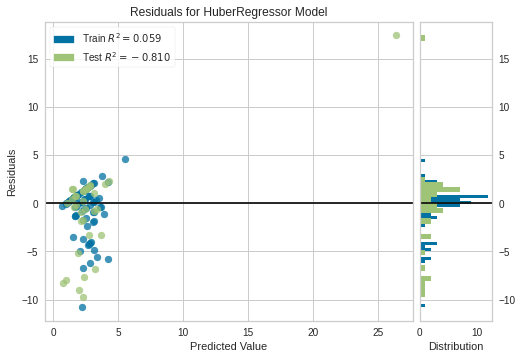

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [23]:
plot_model(huber)

In [24]:
evaluate_model(huber)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
